<a href="https://colab.research.google.com/github/VasylDvorakDS/Transistors_Moor_low_prediction_with_linear_regration/blob/master/Moor_prediction_with_linear_regration_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:


# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv



--2024-05-25 16:28:35--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2024-05-25 16:28:36 (33.8 MB/s) - ‘moore.csv’ saved [2302/2302]



In [3]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [4]:
data=pd.read_csv('moore.csv', header=None).values

In [5]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [6]:
X=data[:,0].reshape(-1, 1)
Y= data[:, 1]

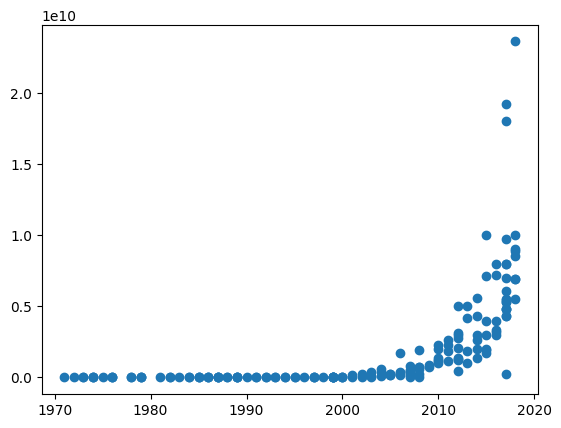

In [7]:
plt.scatter(X, Y);

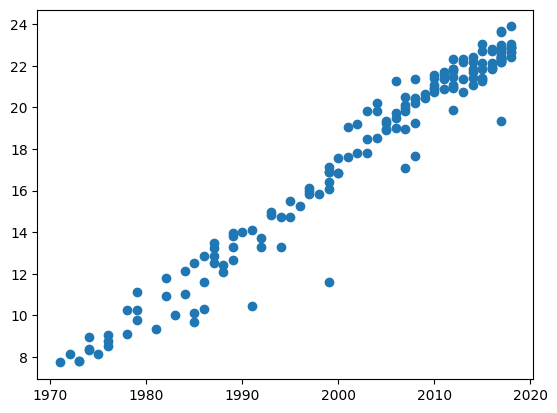

In [8]:
Y=np.log(Y)
plt.scatter(X,Y)

In [9]:
X= X-X.mean()

In [10]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

In [11]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
    loss='mse'
)

In [12]:
def schedule(epoch, lr):
  if epoch >=50:
    return 0.0001
  return 0.001

scheduler= tf.keras.callbacks.LearningRateScheduler(schedule)

In [13]:
r= model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 8ms/step - loss: 438.3390 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 9ms/step - loss: 305.9150 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 8ms/step - loss: 248.8790 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 6ms/step - loss: 202.6938 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 5ms/step - loss: 163.3162 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 163.8696 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 8ms/step - loss: 249.9633 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 252.8270 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 8ms/step - loss: 220.5305 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 5ms/step - loss: 112.3931 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 9ms/step - los

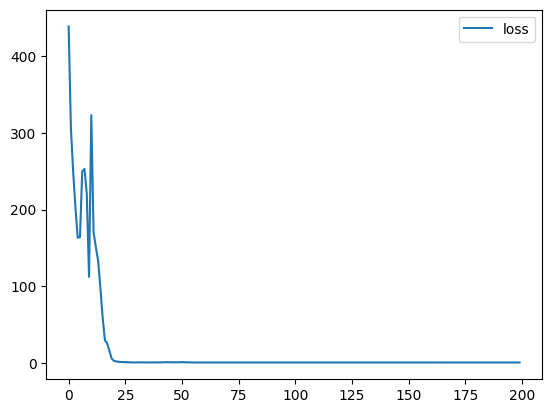

In [14]:
plt.plot(r.history['loss'], label='loss')
plt.legend();

In [15]:
model.layers

In [16]:
model.layers[0].get_weights()

[array([[0.34039578]], dtype=float32), array([17.7743], dtype=float32)]

In [17]:
a=model.layers[0].get_weights()[0][0,0]
a

0.34039578

In [18]:
print('Time to doble:', np.log(2)/a)

Time to doble: 2.036297817153341


In [19]:


# If you know the analytical solution
X = X.flatten()
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - X.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator
print(a, b)

0.3416824873873197 17.764939393631764


In [20]:
print('Time to doble:', np.log(2)/a)

Time to doble: 2.0286295205238805


#Making Predictions

6/6 [==============================] - 0s 2ms/step


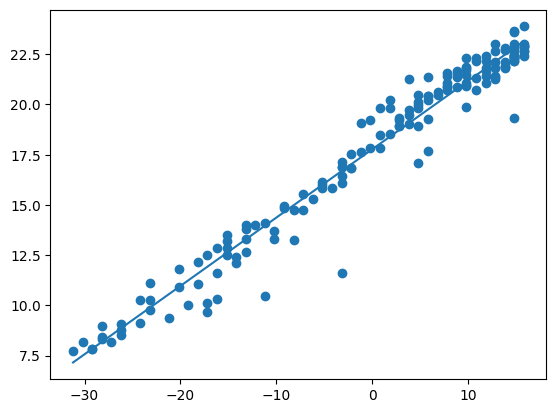

In [21]:
# Make sure the line fits our data
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)

In [24]:
# Manual calculation

# Get the weights
w, b = model.layers[0].get_weights()

In [25]:
# Reshape X because we flattened it again earlier
X = X.reshape(-1, 1)


In [26]:
# (N x 1) x (1 x 1) + (1) --> (N x 1)
Yhat2 = (X.dot(w) + b).flatten()

In [27]:
# Don't use == for floating points
np.allclose(Yhat, Yhat2)

True